# Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
# Make a list of calibration images
#images = glob.glob('calibration_wide/GO*.jpg')
print('Starting')
images = glob.glob('./camera_cal/c*.jpg')
print('Images obtained')
print(images[0])

Starting
Images obtained
./camera_cal\calibration1.jpg


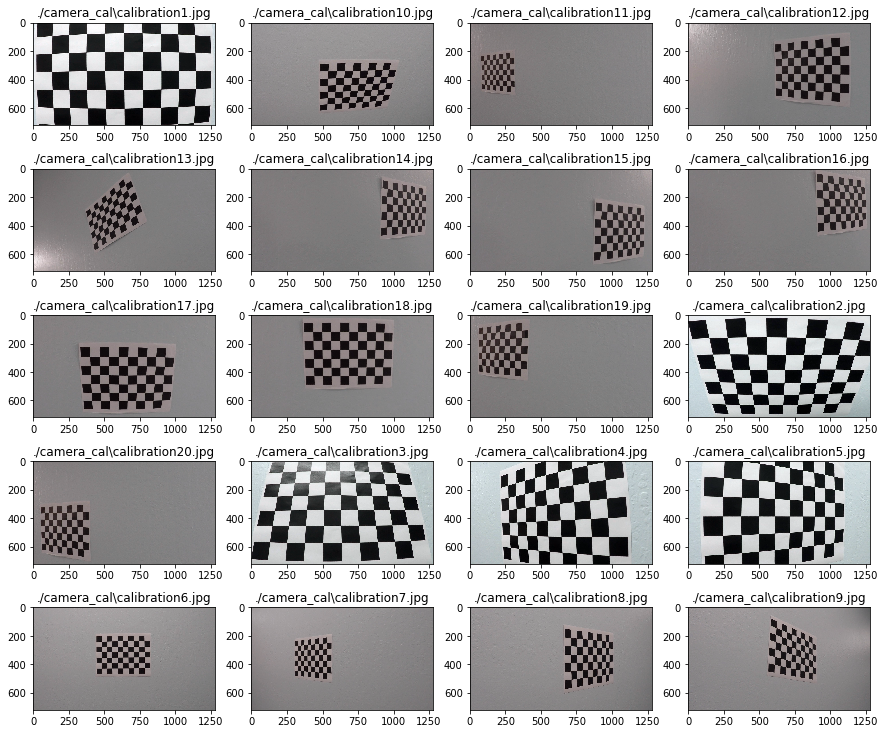

In [3]:
def showImages(images, cols = 4, rows = 5, figsize=(15,10)):
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax,img in zip(axes.flat,images):
            image = cv2.imread(img)
            ax.imshow(image)
            ax.set_title(img)
        
showImages(images, 4, 5, (15, 13))

In [16]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.
img_with_corners = [] #Images with the corners drawn

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('gray',gray)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    #print(ret)
        
    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # Draw and display the corners
        img_with_corners.append(cv2.drawChessboardCorners(img, (9,6), corners, ret))

print('Images with Corners found:{}'.format(len(imgpoints)))
cv2.destroyAllWindows()

Images with Corners found:17


./camera_cal\calibration17.jpg


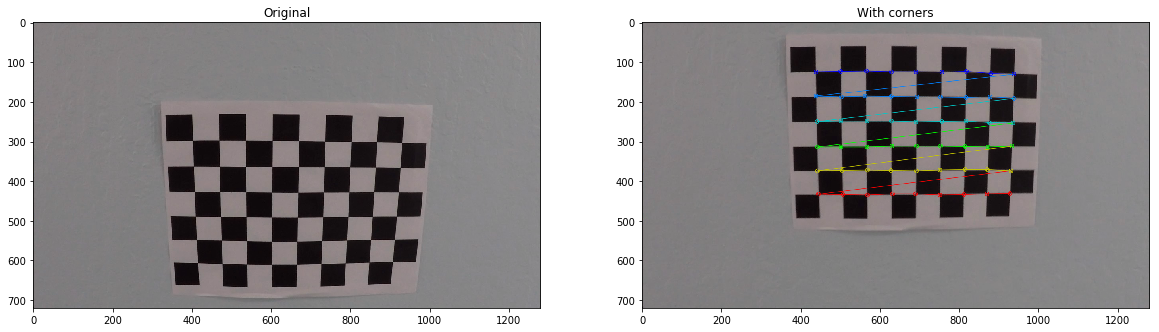

In [25]:
index = 8
orig = cv2.imread(images[index])
print(images[index])
corners = img_with_corners[index]
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(orig)
axes[0].set_title('Original')
axes[1].imshow(corners)
axes[1].set_title('With corners')

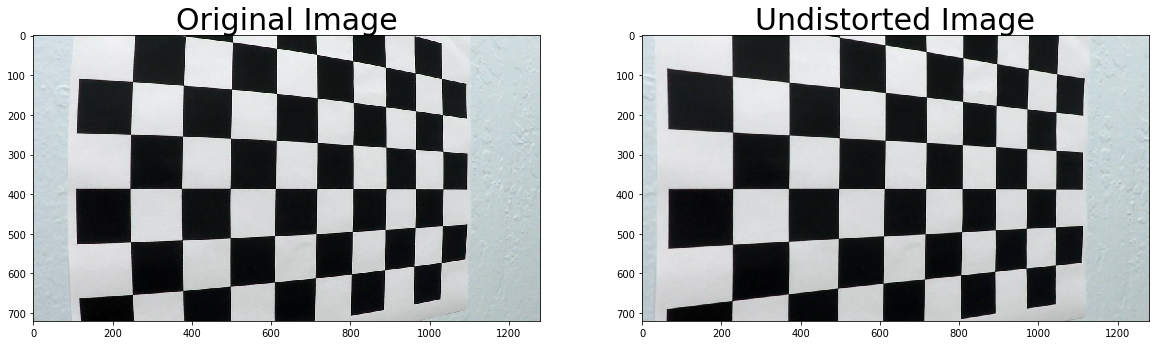

In [29]:
import pickle
%matplotlib inline

# Test undistortion on an image
#img = cv2.imread('calibration_wide/test_image.jpg')
img = cv2.imread('./camera_cal/calibration5.jpg')
img_size = (img.shape[1], img.shape[0])
#print(objpoints)

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
undist = cv2.undistort(img, mtx, dist, None, mtx)

cv2.imwrite('./camera_cal/calibration11_undist.jpg',undist)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open("./camera_cal/cam_calib_pickle.p", "wb" ) )

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=30)